# Hello there! 👋

Thank you so much for joining this experiment, *it means the absolute world to us*! It pleases us so much to see you participating!

**Approximate duration: *15 minutes*.**


The goal of this user study, is to evaluate the ability of users (you) to integrate their own natural language processing pipeline components for **entity linking** and use them as if they were part of the **Combining Linking Techniques** (CLiT) framework. We will achieve our goal by assisting you through the process of integrating a well-known mention detection system called [FLAIR](https://github.com/flairNLP/flair).

**Your Task**: You will proceed through this Jupyter Notebook by running each executable cells with code - for one of them you will have a small guided task (4 lines of code) and will be guided through interactions with the CLiT web front-end. At the end, there will be a questionnaire (Google Forms) that we'd appreciate you to fill out. (Thank you so much in advance!)

You can run each cell, for instance, by emulating what the following image portrays.
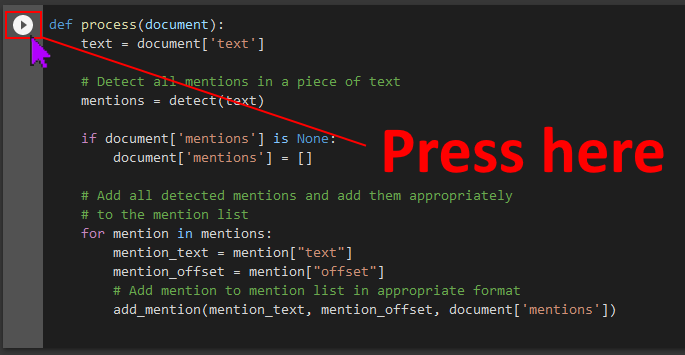

___________________________________________________________________
**Short description of what the framework is and does**: *Combining Linking Techniques* (CLiT) is a framework designed to easily integrate novel entity linkers, as well as systems they rely on, such as mention detection, candidate generation and entity disambiguation systems -- additionally to easily-pluggable mechanisms to benefit their interactions, among others.
Our goals in developing this framework are to **1)** easily reusing existing systems, **2)** combining these with other systems on-the-fly and **3)** support automated entity linker analysis.
___________________________________________________________________

Before going into that, let us shortly introduce the Combining Linking Techniques web front-end available at [clit.tech:8080](http://clit.tech:8080).


It is an entity linker combination webservice running a version of the Docker container(s) offered on our [GitHub page](https://github.com/kmdn/combining-linking-techniques). For simple in-detail one-click installation instructions, as well as for various kinds of relevant information, we refer to the aforementioned GitHub [repository](https://github.com/kmdn/combining-linking-techniques). You may install the framework on a local machine and follow the following steps, but we offer the *Combining Linking Techniques* (CLiT) webservice as a convenience and synchronize it with the latest versions in our repository occasionally.

# Part 0: Running an existing system.
Now we can run some simple tests to familiarise ourselves with the framework. For that, we are going to create a custom pipeline (*Complex Linker Pipeline*) that does mention detection on a simple input sentence.


1. Open a new tab in your browser and navigate to the deployed CLiT web front-end [here](http://clit.tech:8080).
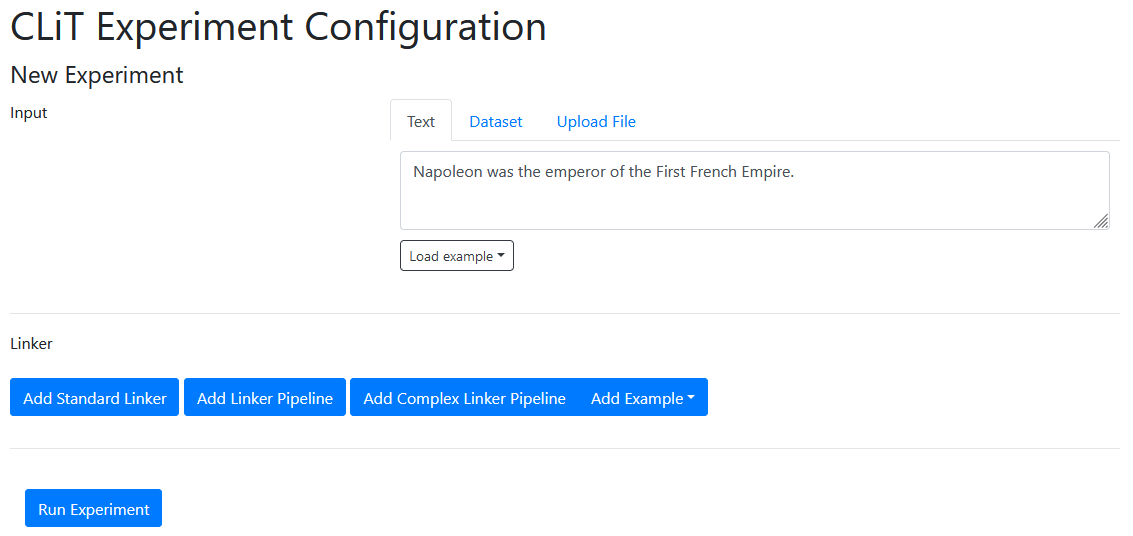
2. Click '*Add Complex Linker Pipeline*', to add a new experiment. 
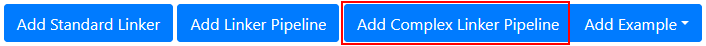
3. A placeholder experiment in graph form is displayed. 
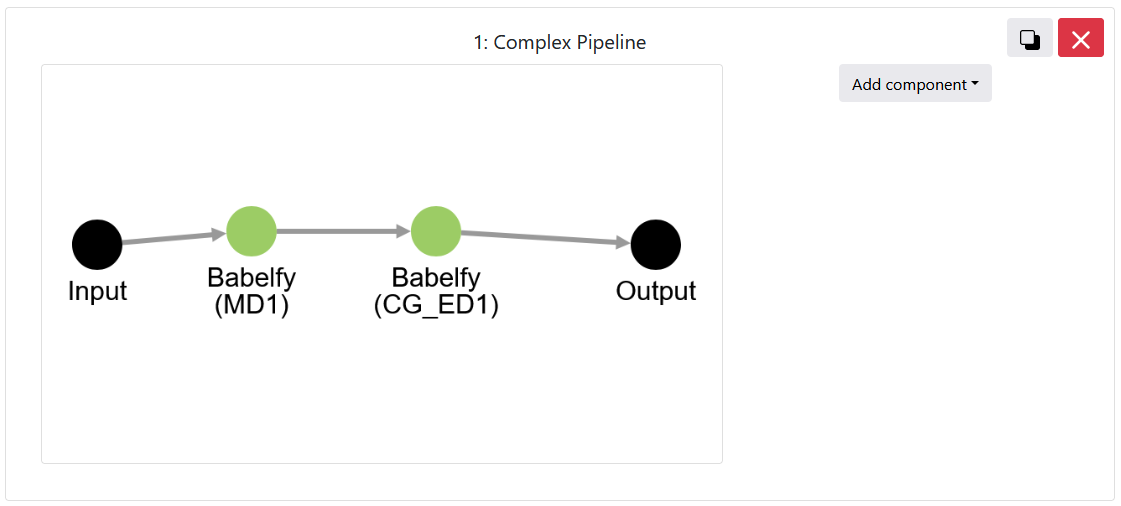
For now, we are only interested in '*mention detection*' and we should therefore delete unnecessary processing nodes (via clicking and pressing the 'Delete' button or pressing your keyboard's DEL key) until only the nodes with the labels *Input*, *Output* and *MD1* are visible. Note that **Input** and **Output** components *should not* and *can not* be deleted. For our case, only the **CG\_ED1** component should be deleted, resulting in the following.
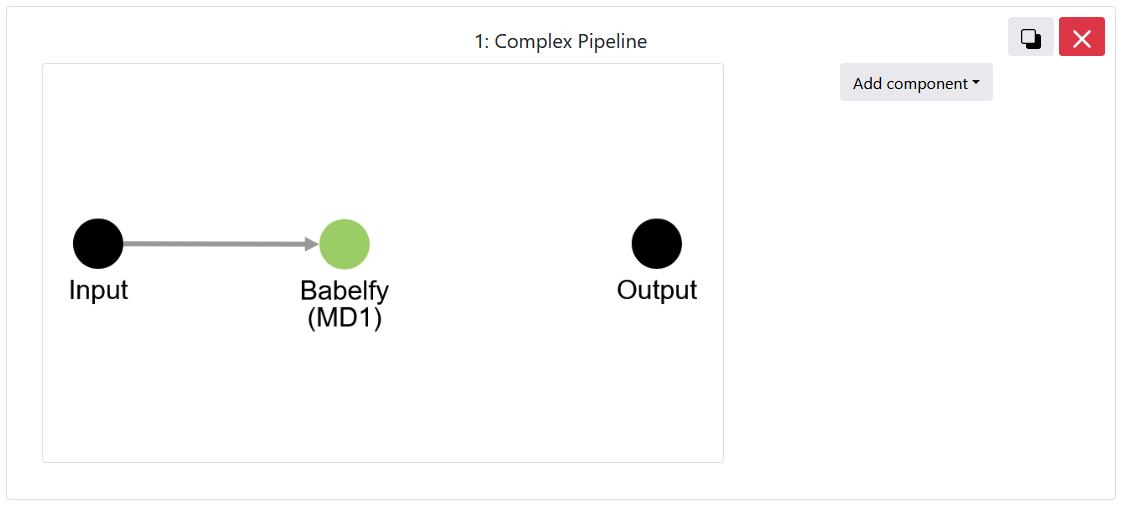

4. By clicking on a component (node), you can adjust attributes and execution settings, including which system will be run and to which subsequent system its output will be passed to. In this simple example make sure that the pipeline looks as follows by adding the missing links from (*Sources*), and, to (*Targets*) MD1.
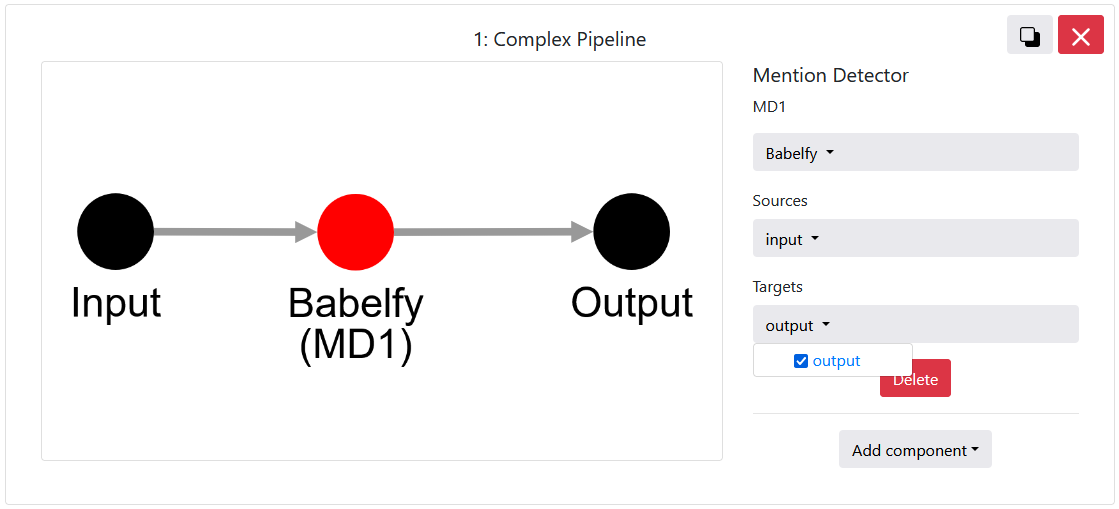

5. Now click on "Run Experiment" (at the bottom) to see the results in a new tab. Depending on server traffic, this may take a few seconds. **Note**: This may take a few seconds and you might need to give the page the permission to open pop-up windows in your browser. 
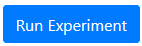

Now that we have familiarised ourselves with one of the built-in systems' mention detection mechanisms (Babelfy), we will try in the following to use a mention detection system (*Part 1*) that is (for the sake of learning) not yet supported by *CLiT* by default (FLAIR) and execute it with existing systems (*Part 2*).

# Part 1: Integrate a custom mention detection system.
As mentioned in the previous section, to make this as easy to use as possible, this notebook provides a template for integrating own mention detection in the pipeline. Please run all cells with code by pressing (**Ctrl**+**Enter**).

## Detecting mentions from a document (plaintext)

### Function processing a given document
*Proceed by running the cell. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
def process(document):
    text = document['text']

    # Detect all mentions in a piece of text
    mentions = detect(text)

    if document['mentions'] is None:
        document['mentions'] = []

    # Add all detected mentions and add them appropriately 
    # to the mention list
    for mention in mentions:
        mention_text = mention["text"]
        mention_offset = mention["offset"]
        # Add mention to mention list in appropriate format
        add_mention(mention_text, mention_offset, document['mentions'])


#### Helper function definition to add a mention to the mention list during processing as a dictionary (for simple JSON transformation)
*Proceed by running the cell. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
def add_mention(mention, offset, mentions_list):
    mention_object = {
            "mention": mention,
            "offset": offset
            }
    mentions_list.append(mention_object)

#### Simulate adding our own mention detection implementation.
In this case, we use FLAIR [[1]](https://github.com/flairNLP/flair) as an existing and running system that we want to integrate into the *Combining Linking Techniques* framework.

#### FLAIR-specific code

1. Installing FLAIR
2. Helper function to translate FLAIR offsets into commonly-used 0-indexed offsets.

*Proceed by running the cells. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
# FLAIR installation via pip
!pip install flair

In [ ]:
def transform_spans_into_mentions(spans, text):
    mentions = []
    for entity in spans:
        mentions.append({"text": entity.text, "offset": entity.start_position})
       
        if len(entity) > 1:
            for token in entity:
                mentions.append({"text": token.text, "offset":  token.start_position})
    return mentions

### **TODO**. *Your turn*: Adapt the following function to detect mentions (aka. *spans*) with a custom mention detector (FLAIR).
Useful documentation from HuggingFace on how to perform NER tagging with FLAIR and extract relevant spans may be found here: [https://huggingface.co/flair/ner-english#demo-how-to-use-in-flair](https://huggingface.co/flair/ner-english#demo-how-to-use-in-flair). **It is enough to only read the first linked demo in order to implement this cell.**

*After implementing the 4 lines, proceed by running the cell. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

def detect(text):
    # Loading SequenceTagger / NER model (1 line)

    # Convert given text into a FLAIR sentence object (1 line)

    # Run system - in this case: predict (1 line)

    # Get spans and assign to variable - Call get spans on sentence object (1 line)
    spans = ?
    
    # Translate spans into mentions for our system & return them
    return transform_spans_into_mentions(spans, text)

## Flask setup for our webservice
*Proceed by running the cells. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
from flask import Flask, request, Response, jsonify
import json
#import spacy

app = Flask(__name__)

print("Initialised Flask app")


In [ ]:
@app.route('/', methods=['get', 'post'])    
def index():
    print("Incoming request:")
    print(request.data)
    req = json.loads(request.data)
    document = req['document']

    process(document)

    return jsonify(
            {'document' : document,
            'pipelineConfig' : req['pipelineConfig'],
            'componentId' : req['componentId']}
            )

### Flask logging and optional loading of required data structures
*Proceed by running the cell. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
class LoggingMiddleware(object):
    def __init__(self, app):
        self._app = app

    def __call__(self, env, resp):
        errorlog = env['wsgi.errors']
        #pprint.pprint(('REQUEST', env), stream=errorlog)

        def log_response(status, headers, *args):
            #pprint.pprint(('RESPONSE', status, headers), stream=errorlog)
            return resp(status, headers, *args)

        return self._app(env, log_response)


# Run at flask startup (Credit: https://stackoverflow.com/a/55573732)
with app.app_context():
    pass

### Google Colab-specific

Required to reach the setup API and not necessary for usual Jupyter Notebooks. 

1. Install flask-ngrok
2. Execute run_with_ngrok


Credit to: https://www.geeksforgeeks.org/how-to-run-flask-app-on-google-colab/

*Proceed by running the cell. (Note: Either press the "Run" / "Play" button at the top left of the cell or Ctrl+Enter)*

In [ ]:
# For Google Colab (Credit: https://www.geeksforgeeks.org/how-to-run-flask-app-on-google-colab/ )
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
run_with_ngrok(app)

### **Run FLASK mention detection webservice** with our custom system.

The FLASK webservice only accepts GET and POST requests. Trying to open the web page results in error code 500.

**Note**: *This cell will continue executing (it listens to requests) and will react to being called.* 

After executing the cell, you may move on to the final part of this experiment.

In [ ]:
if __name__ == '__main__':
    #port = 5001 # MAKE SURE YOU DON'T USE THE SAME PORT ON THE OTHER PIPELINE COMPONENTS
    #print("Running app... on port: ", port)
    print("Running API web service...")
    app.wsgi_app = LoggingMiddleware(app.wsgi_app)
    #app.run(host='0.0.0.0', port=port)
    app.run()

Incoming request:
b'{"document":{"uri":null,"text":"Napoleon was the emperor of the First French Empire.","mentions":null,"componentId":"input","pipelineType":"NONE"},"pipelineConfig":{"startComponents":["MD1"],"components":{"cg":[],"md":[{"id":"MD1","value":"http://a1b3-34-32-162-77.ngrok.io"}],"cg_ed":[{"new":true,"id":"CG_ED1","value":"REL"}],"ed":[]},"exampleId":"md_combined_cged","endComponents":["CG_ED1"],"displayName":"MD + combined CG-ED","id":1,"connections":[{"source":"MD1","target":"CG_ED1"}],"pipelineConfigType":"complex"},"componentId":"MD1"}'
2023-05-04 12:33:46,908 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


INFO:werkzeug:127.0.0.1 - - [04/May/2023 12:33:48] "POST / HTTP/1.1" 200 -


Incoming request:
b'{"document":{"uri":null,"text":"Napoleon was the emperor of the First French Empire.","mentions":null,"componentId":"input","pipelineType":"NONE"},"pipelineConfig":{"startComponents":["MD1"],"components":{"cg":[],"md":[{"id":"MD1","value":"http://a1b3-34-32-162-77.ngrok.io"}],"cg_ed":[{"id":"CG_ED1","value":"REL"}],"ed":[]},"exampleId":"md_combined_cged","endComponents":["CG_ED1"],"displayName":"MD + combined CG-ED","id":1,"connections":[{"source":"MD1","target":"CG_ED1"}],"pipelineConfigType":"complex"},"componentId":"MD1"}'
2023-05-04 13:19:50,526 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


INFO:werkzeug:127.0.0.1 - - [04/May/2023 13:19:51] "POST / HTTP/1.1" 200 -


## Run our (FLAIR) system through the web front-end.

1. Go back to the tab with the front-end opened (link [here](http://clit.tech:8080)) with the previously-created pipeline.
2. Click on **Babelfy (MD1)** node. 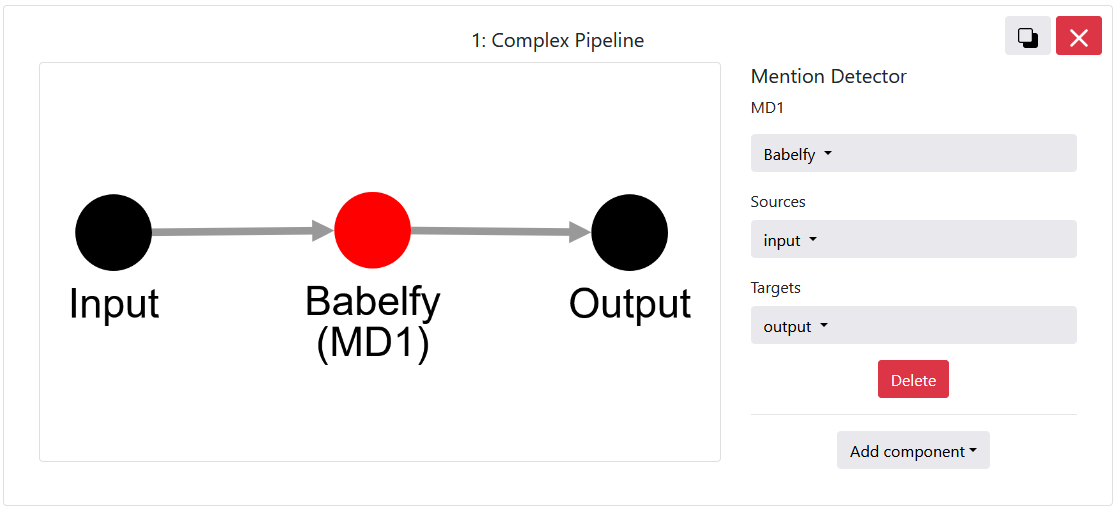
3. Open the dropdown list with all available mention detection systems.
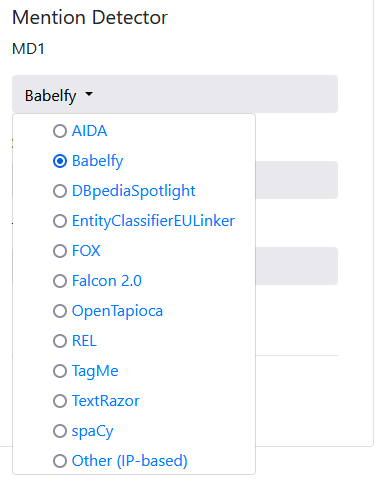
4. Select "Other (IP-based)". A text field appears beneath the dropdown list. 
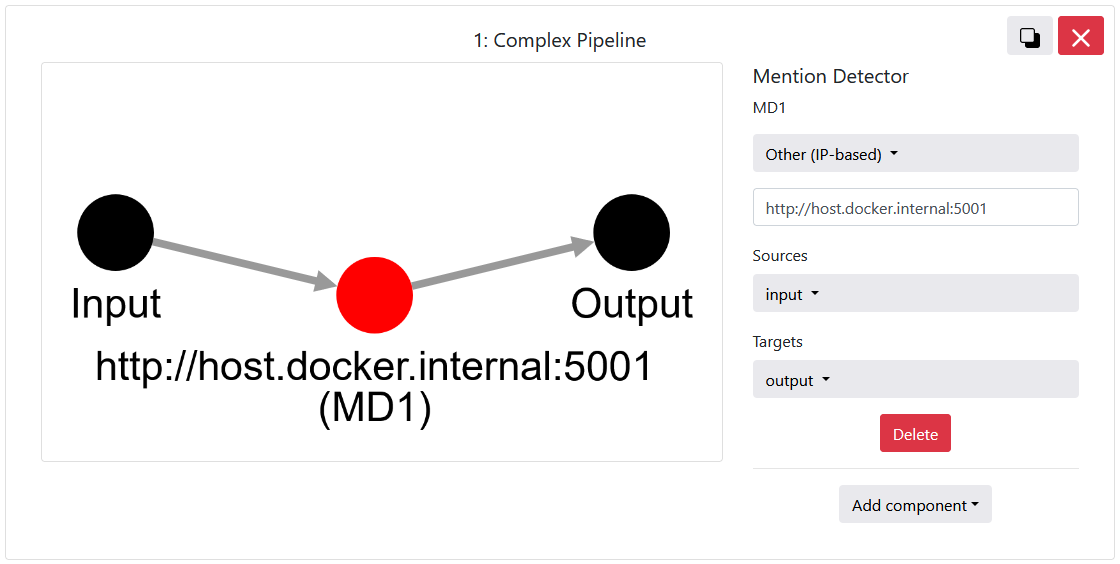
Fill in the IP from the previous cell's output - you may find it in a line looking along these lines:  "\* Running on http://xxxx-xxx-xxx-xxx-xxx.ngrok.io "
5. Press "Run Experiment".
6. The *Combining Linking Techniques* framework will request your system found under the passed IP address to run *mention detection* and open the results of the pipeline in a new tab.

# Part 2: Using new and existing systems together

## Combining our system (*FLAIR*) and any other supported system.
Now let's use our own system (represented here by FLAIR) webservice we just set up together with existing systems!

0. From before, your execution graph on [clit.tech:8080](http://clit.tech:8080) should look something along these lines:
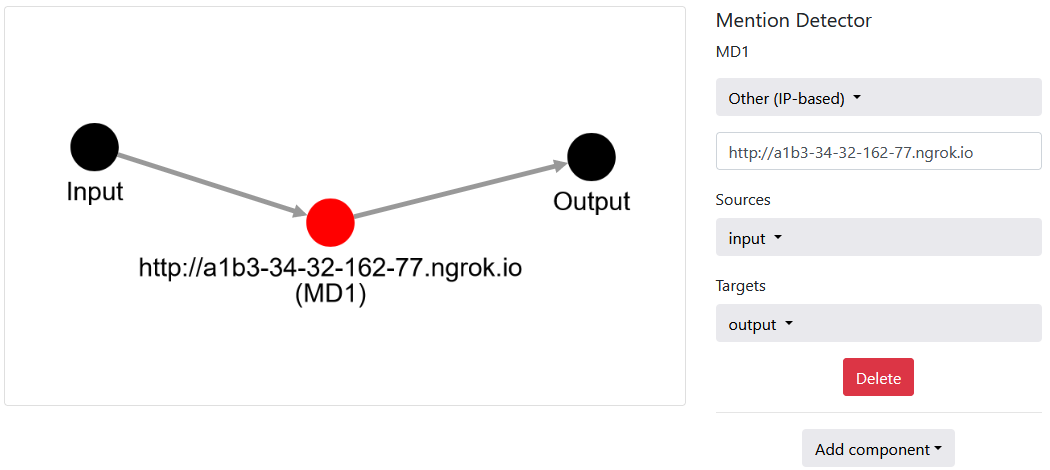
1. Now, let's add a combined candidate generator & entity disambiguator by clicking "Add Component" and choosing "*Candidate Generator Disambiguator (Combined)*" from the list.
2. Click on the node (*note*: you can drag and drop it) and change it to a system of your liking by clicking on its top-most dropdown list. In our example, we use "REL".)

3. Set the connections (*Sources* and *Targets*) as shown in the following picture similarly to the instructions in *Part 1*.
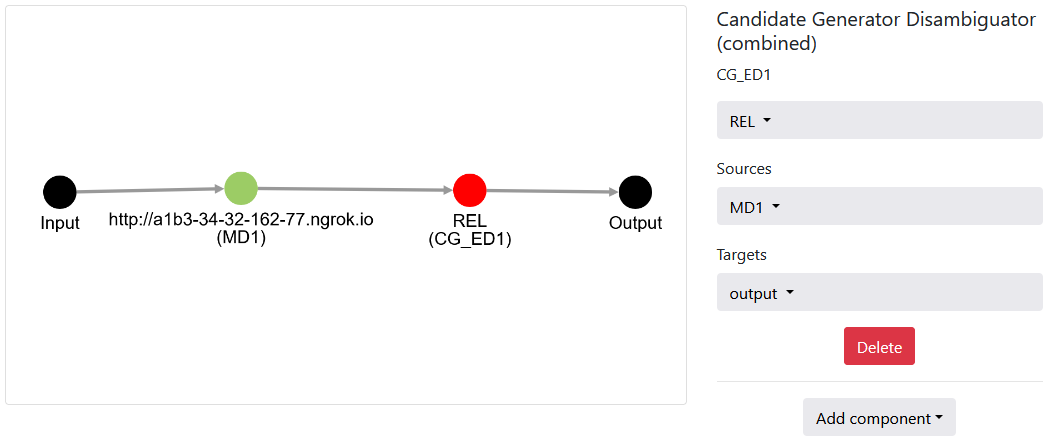

4. Run the experiment.


You have now executed *FLAIR* as a mention detection step, passing its results on to your chosen *candidate generator & entity disambiguator* component. This enabled the execution of an entity linking pipeline based on our implemented system's output.


The results of our executed workflow are shown in the following picture:
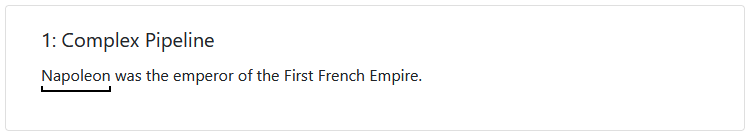


## Playing around!

You may notice that only *Napoleon* is now annotated (with **http://dbpedia.org/resource/Napoleon**) due to *REL* **not** detecting valid entities for the other mentions (spans) suggested by *FLAIR*.

If you change your mention detector to *REL* as well, results are affected and the following would be output.
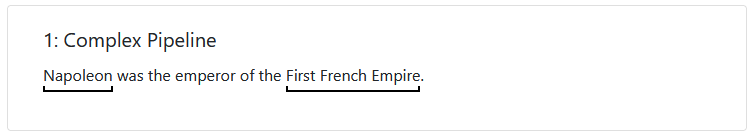

As such, you can play around by switching system configurations however you like and observe effects on results!

# Questionnaire 🌻
Thank you for playing around with our entity linking configuration framework!

Please follow the following Google Forms link to fill out a questionnaire on your experience.

[https://forms.gle/uokJJFubWJ**Kink**MJ8](https://forms.gle/uokJJFubWJKinkMJ8)



Thank you dearly for your active participation! We wish you a great end of week! <3